In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import accuracy_score, confusion_matrix

In [45]:
train=pd.read_csv('train.csv')

In [46]:
X=train.drop('label',axis=1).values.reshape(len(train),28,28,1)/255.
y=train.label.values

In [71]:
# check data distribution (it looks like the label is uniformly distributed)
value,count_num=np.unique(y,return_counts=True)

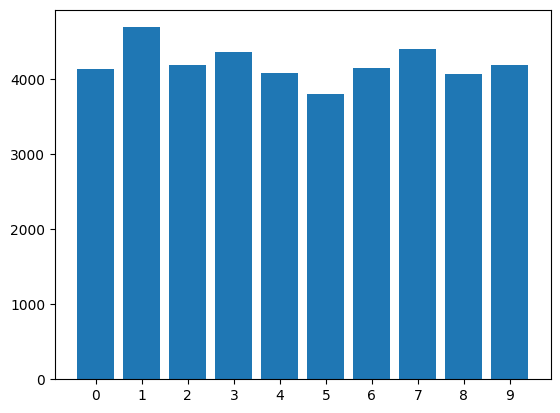

In [76]:
plt.bar(x=value,height=count_num)
plt.xticks(np.arange(min(value), max(value)+1, 1.0))
plt.show()

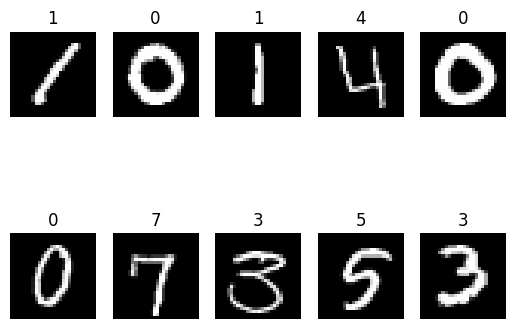

In [47]:
k=1
while k<11:
    plt.subplot(2,5,k)
    plt.imshow(X[k-1],cmap='grey')
    plt.title(y[k-1])
    plt.axis('off')
    k+=1

In [48]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
X_train=X_train.repeat(3,-1)
X_train=tf.convert_to_tensor(X_train)
X_valid=X_valid.repeat(3,-1)
X_valid=tf.convert_to_tensor(X_valid)
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

In [50]:
# Feature extraction (freeze all the layers)
base_model=tf.keras.applications.resnet50.ResNet50(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(28,28,3),name='input_layer')
x=base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
model_0=tf.keras.Model(inputs,outputs)

In [51]:
model_0.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [52]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling_2D (G (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [53]:
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [54]:
model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),epochs=10,callbacks=[earlystop])

Epoch 1/10
919/919 [==============================] - 13s 13ms/step - loss: 1.1239 - accuracy: 0.7096 - val_loss: 0.7381 - val_accuracy: 0.8050
Epoch 2/10
919/919 [==============================] - 10s 11ms/step - loss: 0.6485 - accuracy: 0.8228 - val_loss: 0.5795 - val_accuracy: 0.8368
Epoch 3/10
919/919 [==============================] - 10s 11ms/step - loss: 0.5348 - accuracy: 0.8501 - val_loss: 0.5027 - val_accuracy: 0.8537
Epoch 4/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4727 - accuracy: 0.8638 - val_loss: 0.4541 - val_accuracy: 0.8677
Epoch 5/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4318 - accuracy: 0.8751 - val_loss: 0.4222 - val_accuracy: 0.8725
Epoch 6/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4026 - accuracy: 0.8839 - val_loss: 0.3936 - val_accuracy: 0.8835
Epoch 7/10
919/919 [==============================] - 10s 11ms/step - loss: 0.3788 - accuracy: 0.8902 - val_loss: 0.3731 - val_accuracy:

In [55]:
# fine tuning
model_0.layers

In [56]:
model_0.layers[1].trainable=False
for layer in model_0.layers[1].layers[-10:]:
    layer.trainable=True

In [57]:
for layer in model_0.layers[1].layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001D610E41CA0> False
<keras.layers.convolutional.ZeroPadding2D object at 0x000001D8AFBB89A0> False
<keras.layers.convolutional.Conv2D object at 0x000001D8A30A67C0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001D8A30DFC10> False
<keras.layers.core.Activation object at 0x000001D8A30C7E50> False
<keras.layers.convolutional.ZeroPadding2D object at 0x000001D8A30C7F10> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D8A30C5DF0> False
<keras.layers.convolutional.Conv2D object at 0x000001D8B750E7C0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001D8B750A8B0> False
<keras.layers.core.Activation object at 0x000001D8B7515CD0> False
<keras.layers.convolutional.Conv2D object at 0x000001D8B750E790> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x000001D8B7503F70> False
<keras.layers.core.Activation object at 0x0000

In [58]:
# Fine tuning
model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),epochs=50,callbacks=[earlystop])

Epoch 1/50
919/919 [==============================] - 10s 11ms/step - loss: 0.3238 - accuracy: 0.9047 - val_loss: 0.3307 - val_accuracy: 0.8976
Epoch 2/50
919/919 [==============================] - 10s 11ms/step - loss: 0.3125 - accuracy: 0.9064 - val_loss: 0.3259 - val_accuracy: 0.9002
Epoch 3/50
919/919 [==============================] - 10s 11ms/step - loss: 0.3050 - accuracy: 0.9100 - val_loss: 0.3143 - val_accuracy: 0.9045
Epoch 4/50
919/919 [==============================] - 10s 11ms/step - loss: 0.2984 - accuracy: 0.9110 - val_loss: 0.3026 - val_accuracy: 0.9078
Epoch 5/50
919/919 [==============================] - 10s 11ms/step - loss: 0.2917 - accuracy: 0.9128 - val_loss: 0.2997 - val_accuracy: 0.9087
Epoch 6/50
919/919 [==============================] - 10s 11ms/step - loss: 0.2852 - accuracy: 0.9143 - val_loss: 0.3003 - val_accuracy: 0.9064
Epoch 7/50
919/919 [==============================] - 11s 12ms/step - loss: 0.2806 - accuracy: 0.9165 - val_loss: 0.2850 - val_accuracy:

In [81]:
y_pred=model_0.predict(X_valid)
y_pred=np.argmax(y_pred,axis=1)

In [83]:
y_valid=np.argmax(y_valid,axis=1)

In [84]:
conf_mat=confusion_matrix(y_valid, y_pred)

In [ ]:
conf_mat

<Axes: >

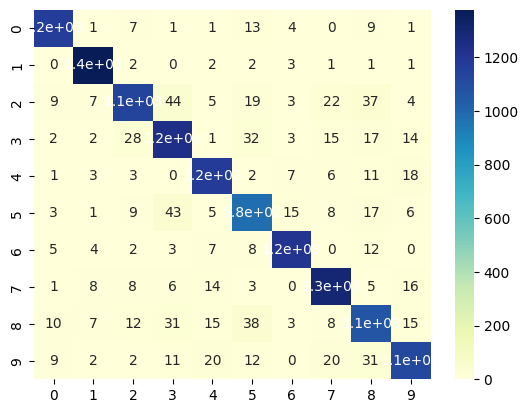

In [91]:
sns.heatmap(conf_mat,annot=True,cmap='YlGnBu')

In [105]:
test=pd.read_csv('test.csv').values.reshape(len(test),28,28,1)/255.

In [113]:
test=test.repeat(3,-1)

In [115]:
y_pred=model_0.predict(test)

In [118]:
y_pred.shape

(28000, 10)

In [119]:
y_pred=np.argmax(y_pred,axis=1)

In [120]:
submit=pd.read_csv('sample_submission.csv')

In [122]:
submit.Label=y_pred

In [124]:
submit.to_csv('sample_submission.csv',index=False)